### 3章 大数の法則，正規分布，中心極限定理

* 大数の法則: 標本サイズが大きくなるほど，その標本の平均は母集団の平均に近づく
* 中心極限定理: 母集団がどのような分布であっても，標本を抽出したときの平均は正規分布に収束する

今日使うパッケージ

* `dplyr`: Dataframe 操作
* `ggplot2`: グラフ作成
* `readr`: データ読み込み
* `Cairo`: グラフ作成（描画，保存）
* `gridExtra`: グラフ作成（低レベルな操作）

その他よく使うパッケージ

* `tidyr`: Dataframe 操作
* `readxl`, `openxlsx`: Excel ファイル読み書き

パッケージのインストール

* RStudio のメニューから
* もしくは `install.packages(packagename)`

読み込み

* `library(packagename)` or `require(packagename)`

一気に読み込む場合

In [1]:
sapply(c("dplyr", "ggplot2", "readr", "Cairo"), require, character.only = TRUE)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: readr
Warning message:
"package 'readr' was built under R version 3.3.3"Loading required package: Cairo


dplyr ggplot2   readr   Cairo 
   TRUE    TRUE    TRUE    TRUE

In [ ]:
search()

In [ ]:
detach(package:readr)

## 3.1 大数の法則: ベルヌーイ試行と真の値への収束

例: コイントス（ベルヌーイ試行）

* 裏（表）が出る確率は `0.5`
    * 母集団の表裏の出る期待確率
* 任意の回数コイントスを繰り返す
    * 母集団から標本を抽出
    * 母集団平均（期待値）の推定
* 試行回数が十分に大きいと `表:裏 = 1:1` に近づく
    * 平均 0.5 に近づく
    * 大数の法則

考えやすいように数式にする

各試行の結果を $x$ とする
* 表: $x = 1$
* 裏: $x = 0$

試行回数10とき，表が出た回数 $r$ は，

$$
r = x_1 + x_2 + \cdots + x_{10}
$$

表が出た確率 $y$ （相対頻度） は，

$$
y = \frac{r}{10}
$$

10回コイントスを行う場合，表が 0--10 回 出る確率は?

* $r$ は確率変数で，$n=10$，$p = 0.5$ の二項分布 `Bi(10, 0.5)` に従う

$$
    P(r) = {}_{10}\mathrm{C}_r (0.5)^r (1 - 0.5)^{10 - r}
$$

* 二項分布の期待値と分散は，

$$
\begin{eqnarray}
    E(r) &=& np \\
    Var(r) &=& np(1 - p)
\end{eqnarray}
$$


期待値について，

$$
\begin{eqnarray}
    E(aX) &=& aE(X) \\
    E(X + a) &=& E(X) + a \\
    E(X + Y) &=& E(X) + E(Y) \\
    E(XY) &=& E(X)E(Y) \; (XとYは独立)
\end{eqnarray}
$$

なので，

$$
E(r / n) = p = 0.5
$$

In [2]:
c(0:10) %>% sapply(function(r){
    ret <- choose(10, r) * 0.5^r * (1-0.5)^(10-r)
    return(data_frame(r = r, p = round(ret, 3)))
}, simplify = FALSE) %>% bind_rows()

r,p
0,0.001
1,0.010
2,0.044
3,0.117
4,0.205
5,0.246
6,0.205
7,0.117
8,0.044
9,0.010


* R で二項分布を扱う場合は，`dbinom()` などを使う

表 3.1

In [3]:
d <- data.frame(r = 0:10, p = round(dbinom(0:10, 10, p=0.5), 3))
d

r,p
0,0.001
1,0.010
2,0.044
3,0.117
4,0.205
5,0.246
6,0.205
7,0.117
8,0.044
9,0.010


In [4]:
options(repr.plot.width = 4, repr.plot.height = 4)

図 3.1

png 
  2

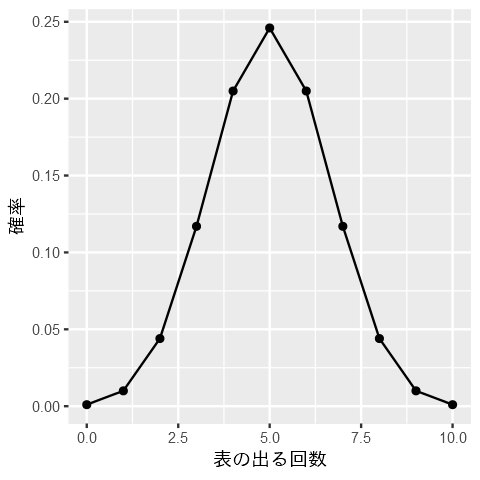

In [5]:
Cairo(type = "raster")
d %>% ggplot(aes(x = r, y = p)) + 
        geom_line() + geom_point() + 
        xlab("表の出る回数") + ylab("確率") + 
        theme(axis.title = element_text(family = "IPAexGothic"))
dev.off()

十分な標本サイズだとほとんどの値が真の期待値の周囲に収束する
（大数の法則）

$$
    P\left( \left|\frac{r}{n} - 0.5 \right| \leq \epsilon \right) \to 1 \; (n \to \infty) 
$$

これは，母集団がどのような確率分布であっても成り立つ

$$
    P\left( \left|\bar{X}_{(n)} - \mu \right| \leq \epsilon \right) \to 1 \; (n \to \infty) 
$$

標本サイズを増やしていって，0.5 近くになる確率を求める

標本サイズ（n）: 10, 50, 100 で，$0.4 \le r/n \le 0.6$

In [6]:
c(10, 50, 100) %>% 
    sapply(function(x){
        a <- 0.4 * x
        b <- 0.6 * x
        prob <- dbinom(x=c(a:b), size=x, prob=0.5) %>% sum()
        cat(x, "回: ", prob, "\n")
    })

10 回:  0.65625 
50 回:  0.8810795 
100 回:  0.9647998 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

標本サイズ（n）: 200, 500, 10000 で，$0.49 \le r/n \le 0.51$

In [7]:
c(200, 500, 1000, 10000) %>% 
    sapply(function(x){
        a <- 0.49 * x
        b <- 0.51 * x
        prob <- dbinom(x=c(a:b), size=x, prob=0.5) %>% sum()
        cat(x, "回: ", prob, "\n")
    })

200 回:  0.276229 
500 回:  0.3771906 
1000 回:  0.49334 
10000 回:  0.9555742 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

## 3.2 正規分布

表3.2 100頭 のブタの20日間における体重増加量（ポンド）

* ほぼ左右対称のベル型分布が得られる

In [8]:
data_frame(ID=c(0:99), dw = c(3, 7, 11, 12, 13, 14, 15, 16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44, 45, 46, 47, 48, 49, 53, 57)) %>% 
    write_csv(path="../data/table3-2.csv")

In [9]:
tbl32 <- read_csv("../data/table3-2.csv")
head(tbl32)

Parsed with column specification:
cols(
  ID = col_integer(),
  dw = col_integer()
)


ID,dw
0,3
1,7
2,11
3,12
4,13
5,14


In [10]:
data_frame(ID=c(0:99), dw = c(3, 7, 11, 12, 13, 14, 15, 16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44, 45, 46, 47, 48, 49, 53, 57)) %>% 
    openxlsx::write.xlsx(file = "../data/table3-2.xlsx")

In [11]:
readxl::read_excel(path="../data/table3-2.xlsx", sheet = 1) %>% head()

ID,dw
0,3
1,7
2,11
3,12
4,13
5,14


In [12]:
str(tbl32)

Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  2 variables:
 $ ID: int  0 1 2 3 4 5 6 7 8 9 ...
 $ dw: int  3 7 11 12 13 14 15 16 17 17 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 2
  .. ..$ ID: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ dw: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [13]:
options(repr.plot.width = 4, repr.plot.height = 4)

png 
  2

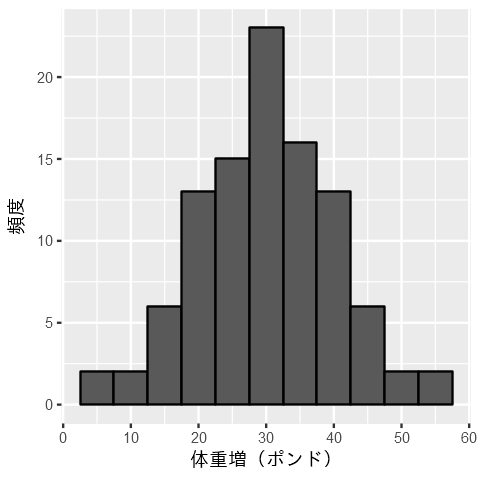

In [14]:
Cairo(type = "raster")
tbl32 %>% 
    ggplot(aes(dw)) + 
        geom_histogram(binwidth = 5, colour = "black") + 
        xlab("体重増（ポンド）") + ylab("頻度") + 
        theme(axis.title = element_text(family = "IPAexGothic"))
dev.off()

正規分布の確率密度関数 $f(x)$ 

$$
    f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[ \frac{-(x - \mu)^2}{2\sigma^2} \right] \; (-\infty \lt x \lt \infty)
$$

ここで，$\mu$: 平均，$\sigma$: 標準偏差

$\mu$，$\sigma$ の値によって正規分布の形は変化する（パラメータ）


In [15]:
options(repr.plot.width = 6, repr.plot.height = 3)

図3.4: 

* 左: $\mu = 0$，$\sigma = 1$
* 右: $\mu = 10$，$\sigma = 2$（青），$\mu = 20$，$\sigma = 4$（赤）

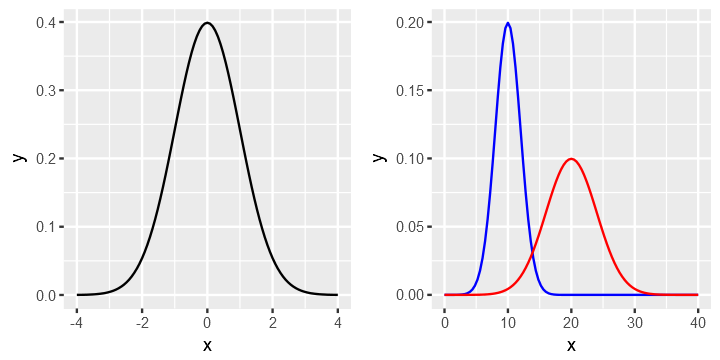

In [16]:
gp1 <- ggplot(data_frame(x = c(-4, 4)), aes(x)) + 
    stat_function(geom="line", fun = dnorm, args = list(mean = 0, sd = 1))
gp2 <- ggplot(data_frame(x = c(0, 40)), aes(x)) + 
    stat_function(geom="line", fun = dnorm, args = list(mean = 10, sd = 2), colour = "blue") + 
    stat_function(geom="line", fun = dnorm, args = list(mean = 20, sd = 4), colour = "red") 
gridExtra::grid.arrange(gp1, gp2, ncol = 2)

標準正規分布: 曲線の下の面積は

* 平均値から$1 \sigma$: 0.3413，両側では0.6826
* 平均値から$2 \sigma$: 0.4772，両側では0.9544
* 平均値から$3 \sigma$: 0.4986，両側では0.9972

標準偏差単位で考えると便利なことがある

例

* Zスコア 

$$
    Z = \frac{x_i - \mu}{\sigma}
$$

1 $\sigma$ の距離

平均 10，標準偏差2 の場合

In [17]:
mu <- 10
sigma <- 2
pnorm(mu + sigma, mean=mu, sd = sigma) - pnorm(mu, mean = mu, sd = sigma)

[1] 0.3413447

平均 20，標準偏差4 の場合

In [18]:
mu <- 20
sigma <- 4
pnorm(mu + sigma, mean=mu, sd = sigma) - pnorm(mu, mean = mu, sd = sigma)

[1] 0.3413447

2 $\sigma$ の距離

平均 10，標準偏差2 の場合

In [19]:
mu <- 10
sigma <- 2
pnorm(mu + 2 * sigma, mean=mu, sd = sigma) - pnorm(mu, mean = mu, sd = sigma)

[1] 0.4772499

平均 20，標準偏差 4 の場合

In [20]:
mu <- 20
sigma <- 4
pnorm(mu + 2 * sigma, mean=mu, sd = sigma) - pnorm(mu, mean = mu, sd = sigma)

[1] 0.4772499

## 3.3 中心極限定理

標本サイズが大きくなるにつれて，標本平均（$\bar{X}$） が母平均（$\mu$）に収束

モンテカルロシミュレーション

In [21]:
f <- function(n, M){
    mean.d <- numeric(M)
    for(k in 1:M){
        d <- runif(n, 0, 10)
        mean.d[k] <- mean(d)
    }
    mean.d
}

In [22]:
f.plt <- function(x){
    gp <- ggplot(data.frame(mean.d = x)) + theme(axis.title = element_text(family = "IPAexGothic"))
    gp1 <-  gp + geom_histogram(aes(x = mean.d), bins = nclass.Sturges(x), 
                                colour = "black", fill=gray(0.8)) + 
            xlab("標本平均") + ylab("頻度") 
    gp2 <- gp + stat_qq(aes(sample = mean.d)) + xlab("理論変位置") + ylab("標本変位置")
    gridExtra::grid.arrange(gp1, gp2, ncol = 2)
}

In [23]:
options(repr.plot.width = 6, repr.plot.height = 3)

ヒストグラム と Q-Q プロット

標本サイズ: 3

In [24]:
mean.d1 <- f(3, 100000)

png 
  2

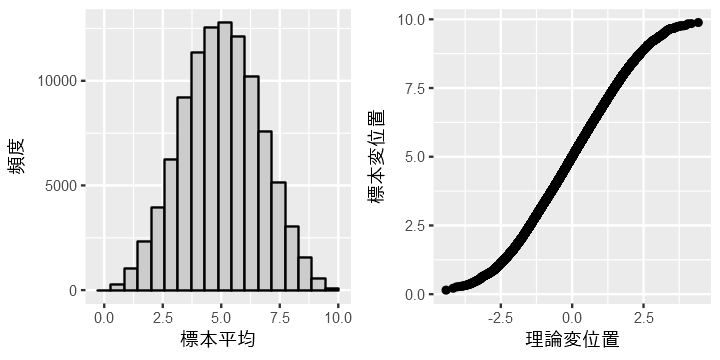

In [25]:
Cairo(type="raster")
f.plt(mean.d1)
dev.off()

標本サイズ: 10

In [27]:
mean.d2 <- f(10, 100000)

png 
  2

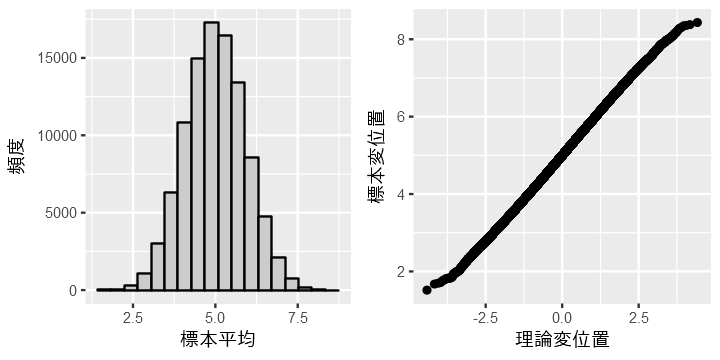

In [28]:
Cairo(type="raster")
f.plt(mean.d2)
dev.off()

標本サイズ: 1000

In [29]:
mean.d3 <- f(1000, 100000)

png 
  2

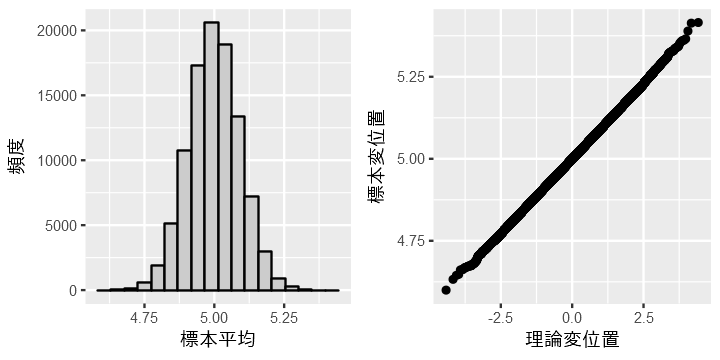

In [30]:
Cairo(type="raster")
f.plt(mean.d3)
dev.off()

In [31]:
options(repr.plot.width = 3, repr.plot.height = 3)

Q-Q プロットを書く

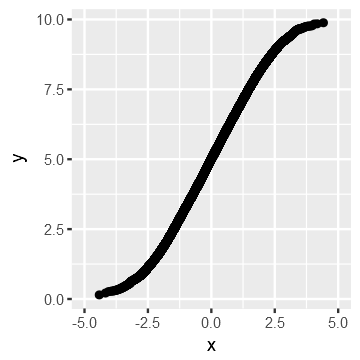

In [32]:
f.plt.qq <- function(s){
    n <- length(s)
    y <- sort(s)
    x <- qnorm(ppoints(n))
    ggplot(data_frame(x, y), aes(x, y)) + geom_point() + 
        xlim(-5, 5)
}
f.plt.qq(mean.d1)

In [33]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en_US.UTF-8                 
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-05-10                  

 package    * version    date       source                            
 assertthat   0.2.0      2017-04-11 CRAN (R 3.3.2)                    
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 cellranger   1.1.0      2016-07-27 CRAN (R 3.2.5)                    
 colorspace   1.3-2      2016-12-14 CRAN (R 3.3.3)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 DBI          0.6-1      2017-04-01 CRAN (R 3.3.3)                    
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                    
 digest       0.6.12     2017-01-27 CRAN (R 3.3.3)                    
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.2.